----
University : UTEC \\
Course       : Machine Learning \\
Professor    : Cristian López Del Alamo \\
Topic        :  Dimensionality reduction

----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


Download : [Dataset](https://drive.google.com/file/d/1X8-AJiG0_qW08rx5l8u1Vs3cmx5W8ETj/view?usp=sharing)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns
from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/UTEC/allFaces'
def Load_data(file):
  faces_m_format = scipy.io.loadmat(file)
  faces = faces_m_format['faces']
  m = int(faces_m_format['m'])
  n = int(faces_m_format['n'])
  nfaces = np.ndarray.flatten(faces_m_format['nfaces'])
  y = np.zeros((faces.shape[1],))
  j = 0
  classes = list(range(len(nfaces)))
  for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i
  print("Total dataset size:")
  print(f"n_samples: {faces.shape[1]}")
  print(f"n_features: {m*n}")
  print(f"n_classes: {len(nfaces)}")
  return faces, y,m,n

X,Y,m,n = Load_data('/content/allFaces.mat')



Total dataset size:
n_samples: 2410
n_features: 32256
n_classes: 38


<ipython-input-4-d1b95d8caec0>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(faces_m_format['m'])
<ipython-input-4-d1b95d8caec0>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(faces_m_format['n'])


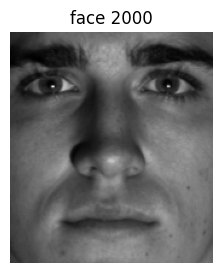

In [5]:
def Plot_Face(image_vec, i,title):
  fig1 = plt.figure(figsize=(10, 3))
  image = image_vec.reshape((m,n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title(title  + str(i))
  plt.axis('off')
  plt.show()


number_image = 2000
image_vec = X.T[number_image]
Plot_Face(image_vec,number_image,'face ')

(2410, 80)


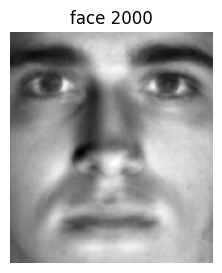

In [6]:
import numpy as np
from sklearn.decomposition import PCA

pca=PCA(n_components=80)
X_pca=pca.fit_transform(X.T) #uso transform
print(X_pca.shape)

data_real = pca.inverse_transform(X_pca[2000,:])
Plot_Face(data_real,2000,'face ')


Variance ratio: 


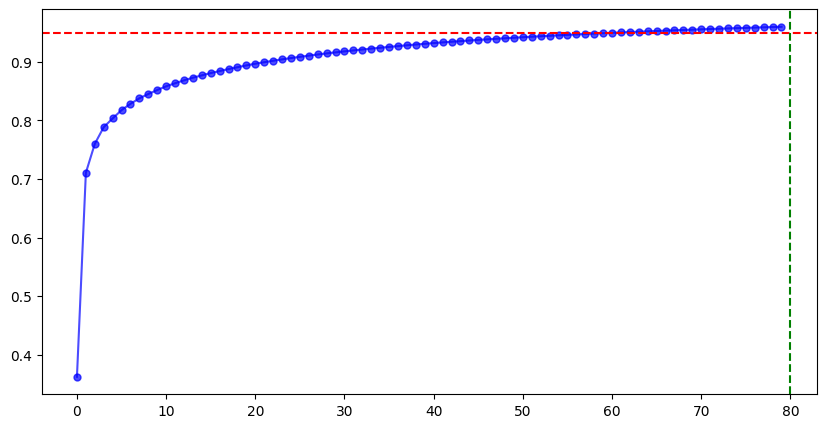

In [7]:
print("Variance ratio: ")
varianza = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(varianza, alpha=0.7, color='b', marker='.', markersize=10)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=80, color='g', linestyle='--')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size=0.25, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train, y_train)

SVC(gamma='auto')

In [10]:
y_pred = svm_model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[11  0  0 ...  0  0  0]
 [ 0 11  0 ...  2  0  0]
 [ 1  0 11 ...  2  1  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 10]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.81        11
         1.0       1.00      0.73      0.85        15
         2.0       1.00      0.73      0.85        15
         3.0       0.91      0.91      0.91        22
         4.0       1.00      0.76      0.86        21
         5.0       0.93      0.93      0.93        14
         6.0       1.00      0.55      0.71        22
         7.0       0.93      0.82      0.88        17
         8.0       1.00      0.88      0.94        17
         9.0       1.00      0.67      0.80        18
        10.0       1.00      0.78      0.88        18
        11.0       1.00      0.89      0.94         9
        12.0       1.00      0.87      0.93        15
        13.0       1.00      0.94      

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
average_type = 'macro'
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)
acc = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("accuracy:", f1)

Precision: 0.8910947377808223
Recall: 0.840917741080953
F1 Score: 0.8435950839096111
accuracy: 0.8435950839096111


# Group work

Form groups of four and apply dimensionality reduction techniques using the methods outlined in the table below. The provided links will direct you to pages containing examples of how to implement these methods. After obtaining the reduced feature vectors for each method, proceed to train models using SVM, KNN, and decision trees. Conclude by presenting a summary table that displays the average precision, recall, F1 score, and accuracy for each method.

# Métodos de Reducción de la Dimensionalidad
--------------------------------------------------
| Método | Link  |
|--------|---------------------------------------|
| PCA (Principal Component Analysis) | [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) |
| SVD (Singular Value Decomposition) | [Truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) |
| NMF (Non-negative Matrix Factorization) | [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) |
| RP (Random Projection) | [Random Projection](https://scikit-learn.org/stable/modules/random_projection.html) |
| UMAP (Uniform Manifold Approximation and Projection) | [UMAP-learn](https://umap-learn.readthedocs.io/en/latest/) (opcional)|
| t-SNE (t-Distributed Stochastic Neighbor Embedding) | [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) |

-----


# Métodos de clasificación
------------------------------------------------------
| Modelo          | Enlace a `scikit-learn`                                         |
|-----------------|----------------------------------------------------------------|
| SVM             | [SVM en scikit-learn](https://scikit-learn.org/stable/modules/svm.html)  |
| Decision Tree   | [Decision Trees en scikit-learn](https://scikit-learn.org/stable/modules/tree.html) |
| KNN             | [KNN en scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)   |


------




# Ejemplo de la salida para un método.


### Método de Reducción: NMF

| Modelo | Recall | Precision | F1-Score | Accuracy |
|--------|--------|-----------|----------|----------|
| SVM    | 0.78   | 0.81      | 0.79     | 0.80     |
| DT     | 0.69   | 0.67      | 0.68     | 0.70     |
| KNN    | 0.75   | 0.72      | 0.73     | 0.74     |

------------